In [1]:
#class imbalance>> when one class is in g=higher percentage
#how to deal
#at data level > undersampling, oversample, smote, adasyn, hybrid
#at algorithm level >> class weights and threshold tuning
#ensemble models >>bagging and boosting algorithm internally handles class imbalance

In [6]:
import pandas as pd
import numpy as np

np.random.seed(1)

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = 900
no_class_1 = 100

In [14]:
class_0 = pd.DataFrame({'feature1':np.random.normal(0, 1, no_class_0),
'feature2':np.random.normal(0, 1, no_class_0),
'target':[0]*no_class_0})

In [16]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
          'feature2': np.random.normal(3, 1, no_class_1),
          'target': [1]*no_class_1})

In [20]:
class_1

,feature1,feature2,target
0,3.735345,5.045616,1
1,2.718647,3.147700,1
2,1.595561,2.367808,1
3,2.470434,3.546813,1
4,3.946434,4.455952,1
...,...,...,...
95,4.177823,2.437496,1
96,1.147647,3.734873,1
97,5.352921,1.098590,1
98,4.068238,3.667132,1


In [24]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [26]:
df

,feature1,feature2,target
0,-0.551358,0.482790,0
1,-0.604188,0.666030,0
2,1.234969,0.104910,0
3,-0.103111,-1.563505,0
4,-0.368854,0.958643,0
...,...,...,...
995,4.177823,2.437496,1
996,1.147647,3.734873,1
997,5.352921,1.098590,1
998,4.068238,3.667132,1


In [28]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [30]:
#upsampling
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [32]:
df_majority

,feature1,feature2,target
0,-0.551358,0.482790,0
1,-0.604188,0.666030,0
2,1.234969,0.104910,0
3,-0.103111,-1.563505,0
4,-0.368854,0.958643,0
...,...,...,...
895,-2.094381,-0.795794,0
896,-0.385521,0.286600,0
897,-1.408973,0.424302,0
898,0.076441,0.390234,0


In [34]:
df_minority

,feature1,feature2,target
900,3.735345,5.045616,1
901,2.718647,3.147700,1
902,1.595561,2.367808,1
903,2.470434,3.546813,1
904,3.946434,4.455952,1
...,...,...,...
995,4.177823,2.437496,1
996,1.147647,3.734873,1
997,5.352921,1.098590,1
998,4.068238,3.667132,1


In [38]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1)
#replace = True means sampling with replacement

In [42]:
df_minority_upsampled.shape

(900, 3)

In [44]:
df_minority

,feature1,feature2,target
900,3.735345,5.045616,1
901,2.718647,3.147700,1
902,1.595561,2.367808,1
903,2.470434,3.546813,1
904,3.946434,4.455952,1
...,...,...,...
995,4.177823,2.437496,1
996,1.147647,3.734873,1
997,5.352921,1.098590,1
998,4.068238,3.667132,1


In [46]:
df_minority_upsampled.duplicated().sum()

800

In [48]:
df_majority.shape

(900, 3)

In [50]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [52]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [54]:
#downsampling
df_minority

,feature1,feature2,target
900,3.735345,5.045616,1
901,2.718647,3.147700,1
902,1.595561,2.367808,1
903,2.470434,3.546813,1
904,3.946434,4.455952,1
...,...,...,...
995,4.177823,2.437496,1
996,1.147647,3.734873,1
997,5.352921,1.098590,1
998,4.068238,3.667132,1


In [56]:
df_majority

,feature1,feature2,target
0,-0.551358,0.482790,0
1,-0.604188,0.666030,0
2,1.234969,0.104910,0
3,-0.103111,-1.563505,0
4,-0.368854,0.958643,0
...,...,...,...
895,-2.094381,-0.795794,0
896,-0.385521,0.286600,0
897,-1.408973,0.424302,0
898,0.076441,0.390234,0


In [58]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1)
#replace = True means sampling with replacement

In [60]:
df_majority_downsampled

,feature1,feature2,target
860,0.648790,-0.042435,0
880,1.161142,0.196751,0
874,-0.374507,-1.022989,0
780,-1.178784,0.172154,0
525,0.629625,-0.188289,0
...,...,...,...
494,0.584679,-0.488879,0
255,0.629411,-1.187537,0
672,-1.604342,0.221559,0
481,0.715686,-0.119756,0


In [62]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [64]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [66]:
#synthetic minority oversampling technique

In [72]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_redundant =0, n_features=2, n_clusters_per_class=1, weights = [0.90])

In [74]:
X

array([[-1.25211011,  0.38013025],
       [-1.85674447,  0.12099808],
       [-1.35660743,  0.51353096],
       ...,
       [-0.39690688,  1.22370242],
       [-0.84062703,  1.23308586],
       [ 0.17769961,  2.88645093]])

In [76]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [78]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis = 1)

In [80]:
final_df

,f1,f2,target
0,-1.252110,0.380130,0
1,-1.856744,0.120998,0
2,-1.356607,0.513531,0
3,-1.099367,1.289204,0
4,-1.694893,0.137277,0
...,...,...,...
995,-0.328859,2.382988,0
996,2.964408,0.711256,1
997,-0.396907,1.223702,0
998,-0.840627,1.233086,0


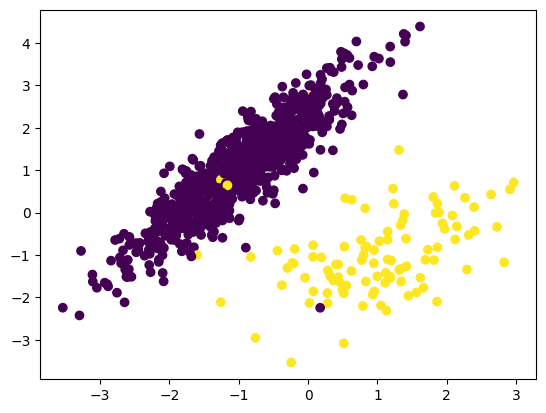

In [82]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [84]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [86]:
X, y = oversample.fit_resample(final_df[["f1", "f2"]], final_df['target'])

In [88]:
X

,f1,f2
0,-1.252110,0.380130
1,-1.856744,0.120998
2,-1.356607,0.513531
3,-1.099367,1.289204
4,-1.694893,0.137277
...,...,...
1787,1.733868,-1.114153
1788,0.449640,-1.630848
1789,0.906213,-1.138404
1790,-0.897775,1.771695


In [90]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1787    1
1788    1
1789    1
1790    1
1791    1
Name: target, Length: 1792, dtype: int32

In [92]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1, df2], axis = 1)

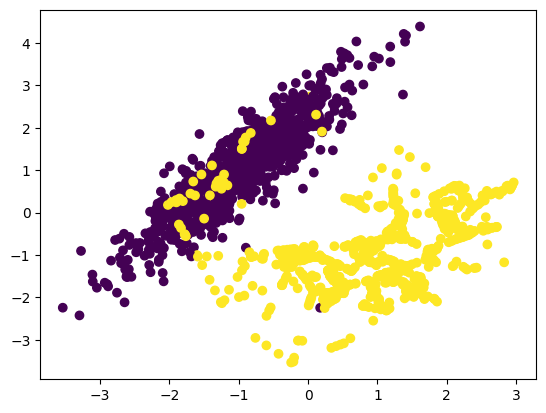

In [94]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])

In [96]:
#another module for data level (undersampling oversampling techiniques) on breast cancer data

In [101]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [105]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [107]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [109]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [117]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target, name = 'target')

In [119]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [121]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

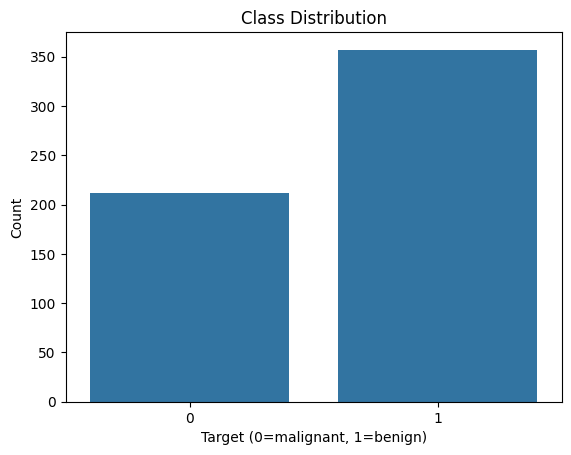

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [123]:
# Count plot
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Target (0=malignant, 1=benign)")
plt.ylabel("Count")
plt.show()

# Value counts
print(y.value_counts(normalize=True))


In [125]:
#class 1 (benign) >> 63 percent >> non cancerous
#class 0 (malignant) >> 37 percent >> cancerous
#slight class imbalance but very important/critical in medical diagnosis

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y) 
#y will be in equal proportion in train and test

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



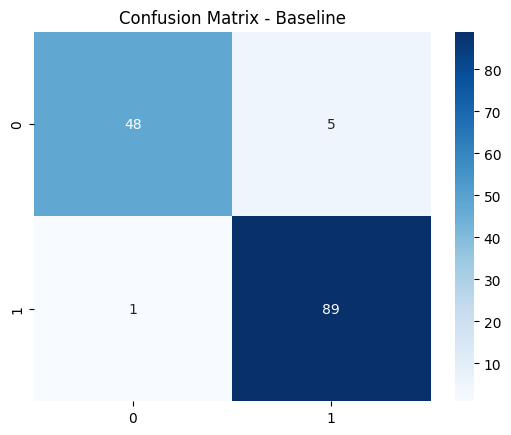

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train baseline
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline")
plt.show()

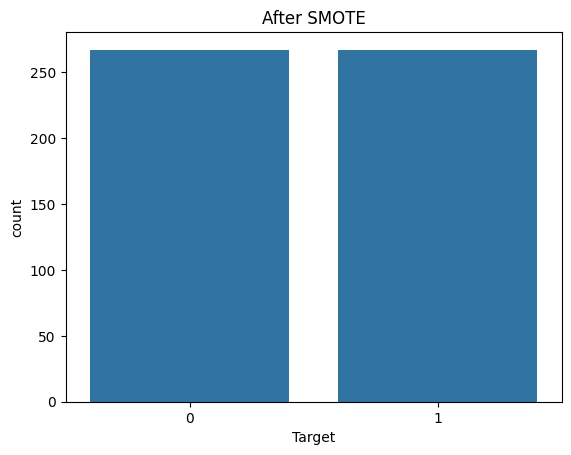

In [133]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Class distribution after SMOTE
sns.countplot(x=y_train_res)
plt.title("After SMOTE")
plt.xlabel("Target")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



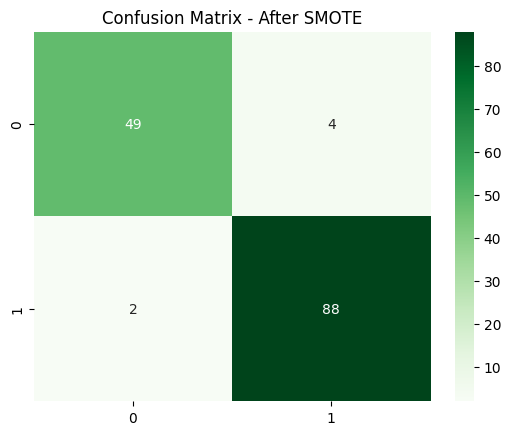

In [135]:
model_smote = LogisticRegression(max_iter=10000)
model_smote.fit(X_train_res, y_train_res)
y_pred_smote = model_smote.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_smote))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - After SMOTE")
plt.show()


In [ ]:
#see the recall as compared to the base model of class 0>> it has improved
#precision has decreased

In [137]:
#till now you have seen at data level, what if you want to make changes at algorithm level

model_weighted = LogisticRegression(class_weight='balanced', max_iter=10000)
model_weighted.fit(X_train, y_train)
print(classification_report(y_test, model_weighted.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.96      0.97      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [139]:
#with compared to baseline and the second model, both precision and recall of class 0(minority) is improved

In [145]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

In [155]:
def evaluate_model(X_resampled, y_resampled, X_test, y_test, title):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    print(f"{title}")
    print(classification_report(y_test, y_pred, digits=4))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.show()


After RandomOverSampler:
 target
0    267
1    267
Name: count, dtype: int64
Random OverSampling
              precision    recall  f1-score   support

           0     0.9600    0.9057    0.9320        53
           1     0.9462    0.9778    0.9617        90

    accuracy                         0.9510       143
   macro avg     0.9531    0.9417    0.9469       143
weighted avg     0.9513    0.9510    0.9507       143



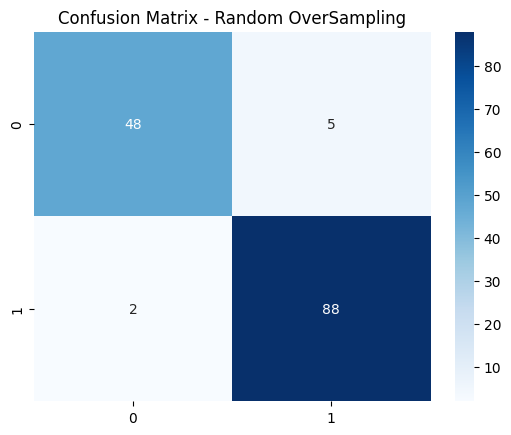

In [157]:
#random oversmapling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("After RandomOverSampler:\n", y_ros.value_counts())
evaluate_model(X_ros, y_ros, X_test, y_test, "Random OverSampling")


After RandomUnderSampler:
 target
0    159
1    159
Name: count, dtype: int64
Random UnderSampling
              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143



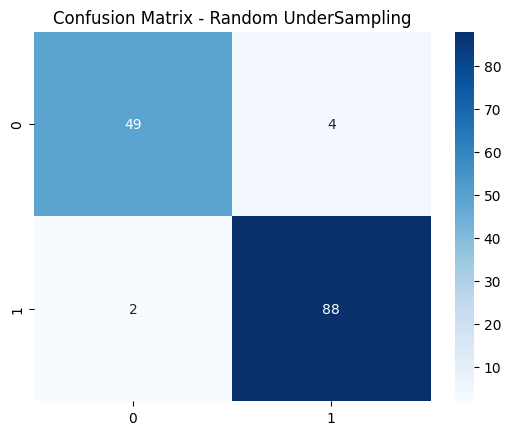

In [160]:
#random undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print("After RandomUnderSampler:\n", y_rus.value_counts())
evaluate_model(X_rus, y_rus, X_test, y_test, "Random UnderSampling")


After SMOTE:
 target
0    267
1    267
Name: count, dtype: int64
SMOTE
              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143



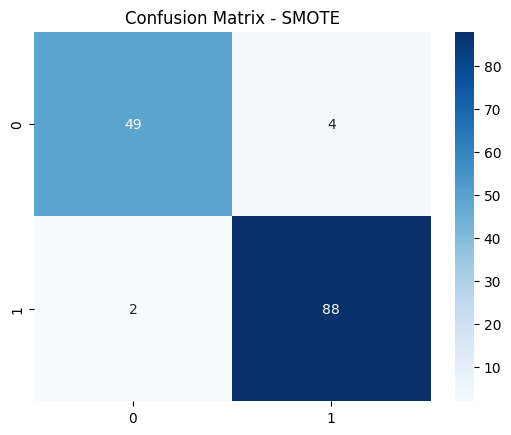

In [162]:
#smote
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_smote.value_counts())
evaluate_model(X_smote, y_smote, X_test, y_test, "SMOTE")


After ADASYN:
 target
0    271
1    267
Name: count, dtype: int64
ADASYN
              precision    recall  f1-score   support

           0     0.9434    0.9434    0.9434        53
           1     0.9667    0.9667    0.9667        90

    accuracy                         0.9580       143
   macro avg     0.9550    0.9550    0.9550       143
weighted avg     0.9580    0.9580    0.9580       143



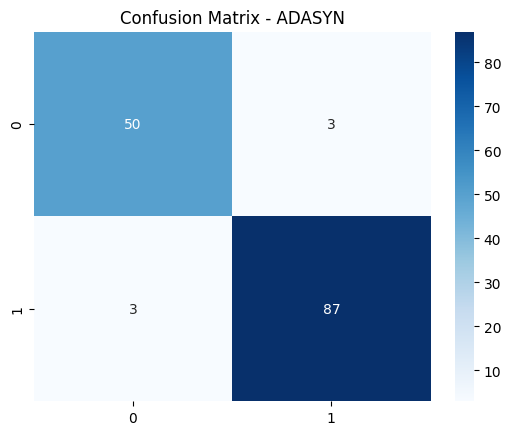

In [164]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

print("After ADASYN:\n", y_adasyn.value_counts())
evaluate_model(X_adasyn, y_adasyn, X_test, y_test, "ADASYN")


In [166]:
#see the precison and recall of class 0-it is highest.
#adasyn also segregates the class, thats why here it performs very well as compared to other methods

After SMOTE + Tomek:
 target
0    261
1    261
Name: count, dtype: int64
SMOTE + TomekLinks
              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143



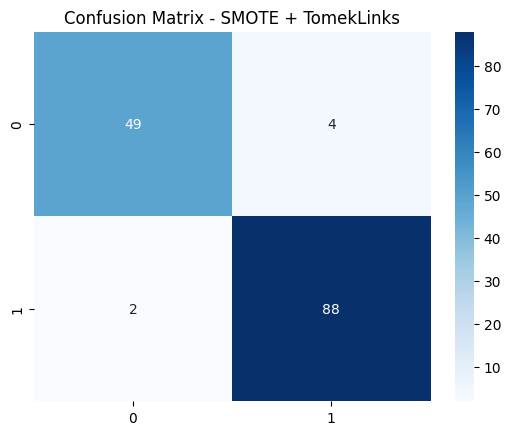

In [170]:
#SMOTE+Tomek
smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

print("After SMOTE + Tomek:\n", y_smt.value_counts())
evaluate_model(X_smt, y_smt, X_test, y_test, "SMOTE + TomekLinks")


After SMOTE + ENN:
 target
1    231
0    230
Name: count, dtype: int64
SMOTE + ENN
              precision    recall  f1-score   support

           0     0.9259    0.9434    0.9346        53
           1     0.9663    0.9556    0.9609        90

    accuracy                         0.9510       143
   macro avg     0.9461    0.9495    0.9477       143
weighted avg     0.9513    0.9510    0.9511       143



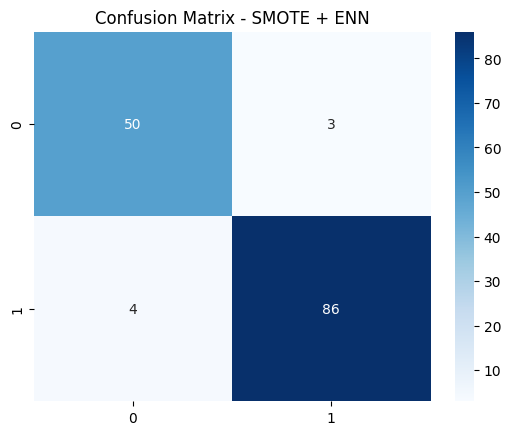

In [172]:
#smote+enn(edited nearest neighbour) >> edited nearest neigbour removes misclassified datapoint>> very useful in overlapping case
#more aggressive towards noise removal
smenn = SMOTEENN(random_state=42)
X_smenn, y_smenn = smenn.fit_resample(X_train, y_train)

print("After SMOTE + ENN:\n", y_smenn.value_counts())
evaluate_model(X_smenn, y_smenn, X_test, y_test, "SMOTE + ENN")
